# Ill-Gaussian Target Practice

In [1]:
] activate "../"

  Activating project at `~/Glamdring/MicroCanonicalHMC.jl`


In [12]:
using Distributions
using ForwardDiff
using LinearAlgebra
using Random

using PyPlot
using Distributed

using Revise
using MicroCanonicalHMC

## MCHMC

In [19]:
d = 100
k = 100
m = Vector(LinRange(1, 100, d))
e = 10 .^ LinRange(log(1/sqrt(k)), log(sqrt(k)), d)
cov_matt = Diagonal(e);

In [20]:
ill_gaussian_target = GaussianTarget(m, cov_matt)
ill_gaussian_spl = MCHMC(0.0, 0.0; varE_wanted=0.1, sigma=ones(d));

In [21]:
ill_gaussian_samples = Sample(ill_gaussian_spl, ill_gaussian_target, 20_000;
                              burn_in=1_000, dialog=true);

Initial Virial loss: 5093.545938010559
eps: 0.5 new x: 

[ Info: Using given sigma ✅
[ Info: Tuning eps ⏳
[ Info: Tuning L ⏳
[ Info: Starting burn in ⏳


[-0.4763766769103687, 0.5072102091084957, -2.3426697883257535, -1.063626908941771, 0.24435388744054742, -0.3634057222255939, 0.30715449033077985, -0.1047943957109188, -1.1784497082169276, 1.221686039437706, 0.006538287212135591, -0.7581775956319385, -0.9665068458481476, -1.458214576702955, 0.7611865368167197, 0.13448775342241442, -0.2977107395346026, 1.0902859383348984, 1.2422029010298568, -0.37106335759687736, -1.1506315456886116, 1.4851099946063042, -0.10819732057405754, -0.30031865101621014, -1.2213567891922086, -0.8240149961793463, -0.7603415321946468, 0.2495926326479511, -0.4028993781778059, -0.8612390720313704, 0.20097036737311189, 1.0844159385597132, 0.039041468110975204, 0.46005320462839294, -0.20242628748267705, -0.6556136462390681, -0.2974648874356658, 0.7872726144496643, 2.2182971702992798, -0.5227301834203578, -0.5981697836694503, -2.6123527671838938, -0.6700045380767422, -0.40541698118573677, -0.18385261601858305, 1.340515949507193, -0.8320945430293568, -0.4751317299242282

eps: 0.5 new x: [-0.3881740387941844, 0.5874612826797954, -2.084265654162321, -0.8433178765318049, 0.430457071003572, -0.13945285546557062, 0.5189692228838406, 0.12584092420453313, -0.9180349409226333, 1.4235991306443538, 0.23385282406712968, -0.5210429149884056, -0.7331700905632964, -1.2260880691655007, 0.9533571882505387, 0.32692997578282923, -0.10914850312608776, 1.255941674432956, 1.3985362932185217, -0.20990355458527388, -0.9931612065589721, 1.6161615251497357, 0.024449009492713725, -0.1749792802651221, -1.0998298239779434, -0.7123098930628047, -0.6564689456165219, 0.34289053205034026, -0.3140781669710341, -0.7774764633981153, 0.27607874965287427, 1.152154816892285, 0.10393034138424959, 0.5193782759738144, -0.14648369752627063, -0.6032752806025642, -0.24961796779794274, 0.8301632541131947, 2.256386845166382, -0.485028348530035, -0.5633979770678674, -2.578847657100634, -0.6405387990306669, -0.37849718795272536, -0.15924304792572985, 1.362369221612271, -0.8110658284121371, -0.455984

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

eps: 0.5 new x: [-0.30344517593767295, 0.6650438019260283, -1.83302225666598, -0.6280149067861176, 0.6131688625960372, 0.08132499175584827, 0.7285525808820591, 0.35480219943900143, -0.6587416036585844, 1.62517856942352, 0.46133438480634037, -0.28322465724357865, -0.49870760591257957, -0.9924399993678046, 1.1470880677164417, 0.5212046262279542, 0.08144705150448374, 1.423570714956711, 1.5568917816620318, -0.04651083895121266, -0.8333794879207055, 1.7492353162183945, 0.15922943821030777, -0.0475487311284163, -0.9762106597715517, -0.5986263284032017, -0.550711269919201, 0.43791640965184275, -0.22358027429956706, -0.6921058635278822, 0.35264998690784183, 1.2212307762878105, 0.1701147119845854, 0.579898853168026, -0.08940159404651143, -0.5498641199247739, -0.20078162024065024, 0.8739461712250846, 2.295272414156507, -0.44653368858031905, -0.5278912177251215, -2.5446325896554125, -0.6104450571015264, -0.3510023088616497, -0.13410683556017514, 1.3846921062724906, -0.7895850678367036, -0.4364247

Excessive output truncated after 524301 bytes.

 0.03514129728977939, 0.026230990656928167, 0.02697252095242515, 0.01766569884549092, 0.028839989763269992, 0.01371335589498794, 0.018912144161462058, 0.013202028114833782, 0.01805705245698492, 0.013247369650033166, 0.017343447434502172, 0.012351630721774467, 0.0078345643125332, 0.010214551687162095, 0.01132078588275146, 0.005499089399810214, 0.010711667715560374, 0.005097913469026868, 0.005523634807233463, 0.010571617884839289, 0.0020925173127378316, -0.0019975968017299068, -0.00017064171863274944, 0.0017732489316742847, 0.0022676419378157833, 0.00408817619658475, 0.0012955732608603754, -0.001545461239474782, 0.003392045461714449, -0.00020965328935457138, -0.0004877253474498961, 0.003952920126614183, -0.00017052708291399017, 0.003220442618095986, 0.0012538440242684692, -0.0031962948344919943, -0.0032819502095443667, -0.009088891733884458, 0.0026007022759819177, 0.002919900909496649, 0.0025521604149309172, -0.0016157208483116563, 0.006073799554829628, 0.005040386153367839, 0.0046155674

In [6]:
ill_gaussian_d1 = [sample[1] for sample in ill_gaussian_samples]
ill_gaussian_d2 = [sample[Int(d/2)] for sample in ill_gaussian_samples];

LoadError: UndefVarError: `ill_gaussian_samples` not defined

In [7]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("MCHMC - Ill Gaussian", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(ill_gaussian_d1, bins=100, range=[-4,4])
axis[1,1].set_yticks([])

axis[2,2].hist(ill_gaussian_d2, bins=100, orientation="horizontal", range=[46, 54])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(ill_gaussian_d1, ill_gaussian_d2, bins=100, range=[[-4,4],[46, 54]])
axis[2,1].set_xlabel("d1")
axis[2,1].set_ylabel("d2");

LoadError: UndefVarError: `ill_gaussian_d1` not defined

## NUTS

In [8]:
using AdvancedHMC
using LogDensityProblems

In [9]:
# Define the target distribution using the `LogDensityProblem` interface
struct LogTargetDensity
    dim::Int
end
LogDensityProblems.logdensity(p::LogTargetDensity, θ) = -ill_gaussian_target.nlogp(θ) #-sum(abs2, θ) / 2  # standard multivariate normal
LogDensityProblems.dimension(p::LogTargetDensity) = p.dim
LogDensityProblems.capabilities(::Type{LogTargetDensity}) = LogDensityProblems.LogDensityOrder{0}()

In [10]:
# Choose parameter dimensionality and initial parameter value
initial_θ = ill_gaussian_target.prior_draw(0.0)
ℓπ = LogTargetDensity(d)

# Set the number of samples to draw and warmup iterations
n_samples, n_adapts = 100_000, 1_000

# Define a Hamiltonian system
metric = DiagEuclideanMetric(d)
hamiltonian = Hamiltonian(metric, ℓπ, ForwardDiff)

# Define a leapfrog solver, with initial step size chosen heuristically
initial_ϵ = find_good_stepsize(hamiltonian, initial_θ)
integrator = AdvancedHMC.Leapfrog(initial_ϵ)

# Define an HMC sampler, with the following components
#   - multinomial sampling scheme,
#   - generalised No-U-Turn criteria, and
#   - windowed adaption for step-size and diagonal mass matrix
proposal = NUTS{MultinomialTS, GeneralisedNoUTurn}(integrator)
adaptor = StanHMCAdaptor(MassMatrixAdaptor(metric), StepSizeAdaptor(0.8, integrator))

# Run the sampler to draw samples from the specified Gaussian, where
#   - `samples` will store the samples
#   - `stats` will store diagnostic statistics for each sample
ill_gaussian_samples_hmc, stats = sample(hamiltonian, proposal, initial_θ, n_samples, adaptor, n_adapts; progress=true)

LoadError: MethodError: no method matching (::MicroCanonicalHMC.var"#prior_draw#48"{Int64})(::Float64)

[0mClosest candidates are:
[0m  (::MicroCanonicalHMC.var"#prior_draw#48")()
[0m[90m   @[39m [35mMicroCanonicalHMC[39m [90m~/Glamdring/MicroCanonicalHMC.jl/src/[39m[90m[4mtargets.jl:202[24m[39m


In [11]:
ill_gaussian_d1_hmc = [sample[1] for sample in ill_gaussian_samples_hmc]
ill_gaussian_d50_hmc = [sample[50] for sample in ill_gaussian_samples_hmc];

LoadError: UndefVarError: `ill_gaussian_samples_hmc` not defined

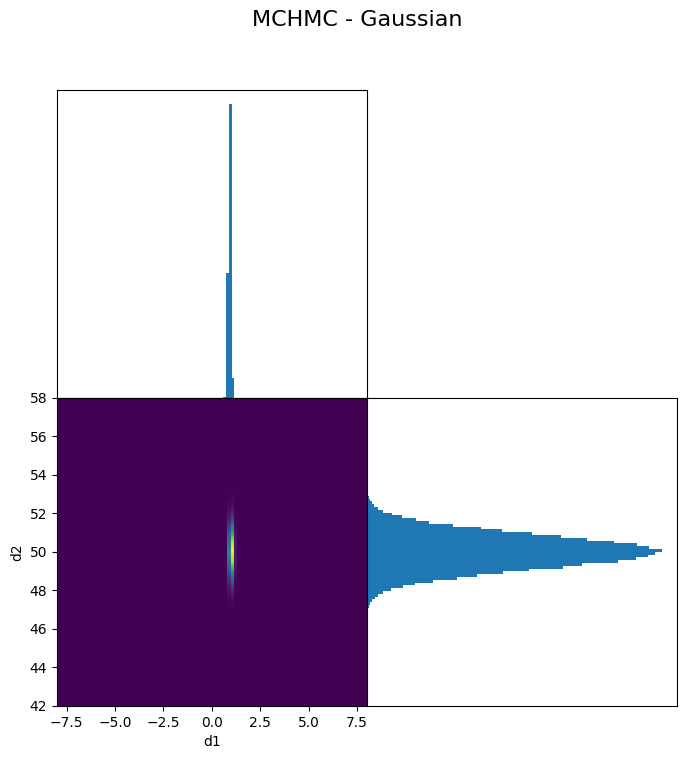

In [27]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("MCHMC - Gaussian", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(ill_gaussian_d1_hmc, bins=100, range=[-8,8])
axis[1,1].set_yticks([])

axis[2,2].hist(ill_gaussian_d50_hmc, bins=100, orientation="horizontal", range=[42, 58])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(ill_gaussian_d1_hmc, ill_gaussian_d50_hmc, bins=100, range=[[-8,8],[42, 58]])
axis[2,1].set_xlabel("d1")
axis[2,1].set_ylabel("d2");